In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

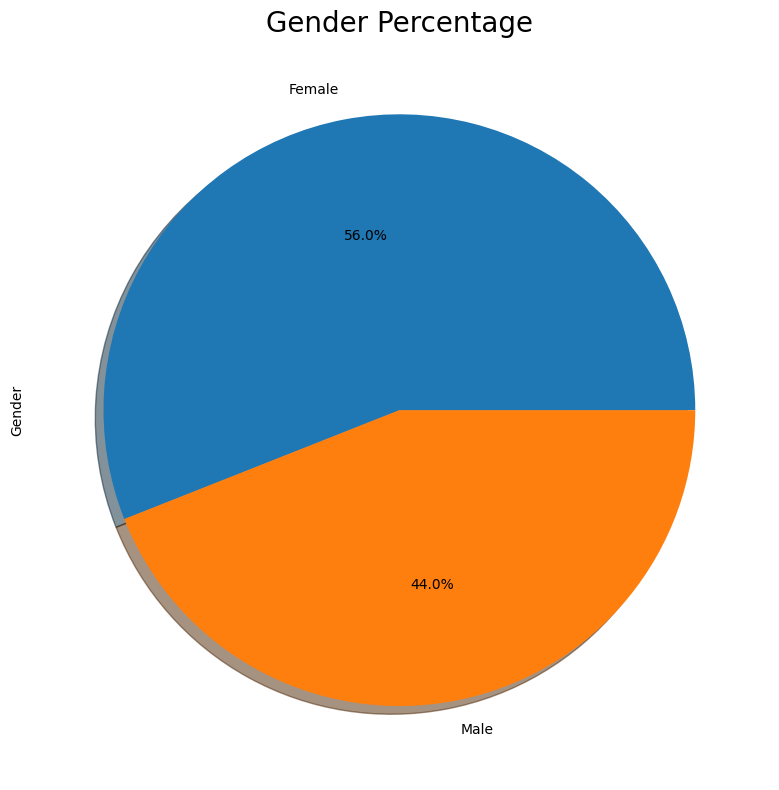

In [11]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Gender Percentage', fontsize=20)
plt.tight_layout()
plt.show()

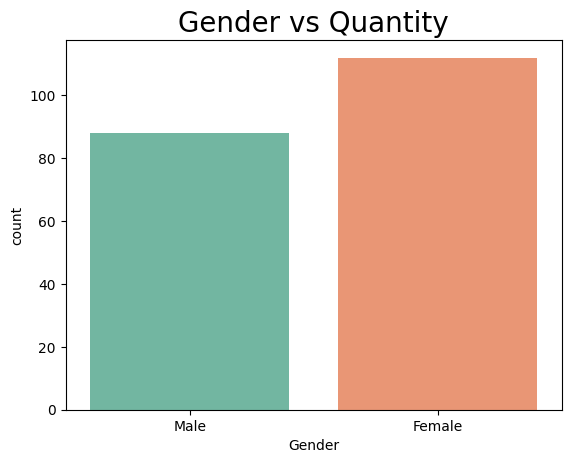

In [13]:
sns.countplot(x=data['Gender'], palette='Set2')
plt.title('Gender vs Quantity', fontsize=20)
plt.show()

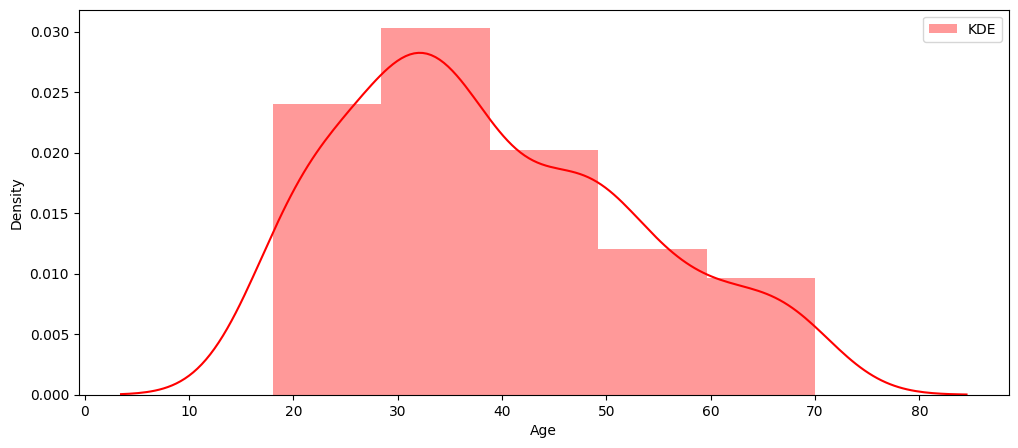

In [14]:
sns.distplot(data['Age'], bins=5, color='red', label='KDE')
plt.legend()
plt.gcf().set_size_inches(12,5)

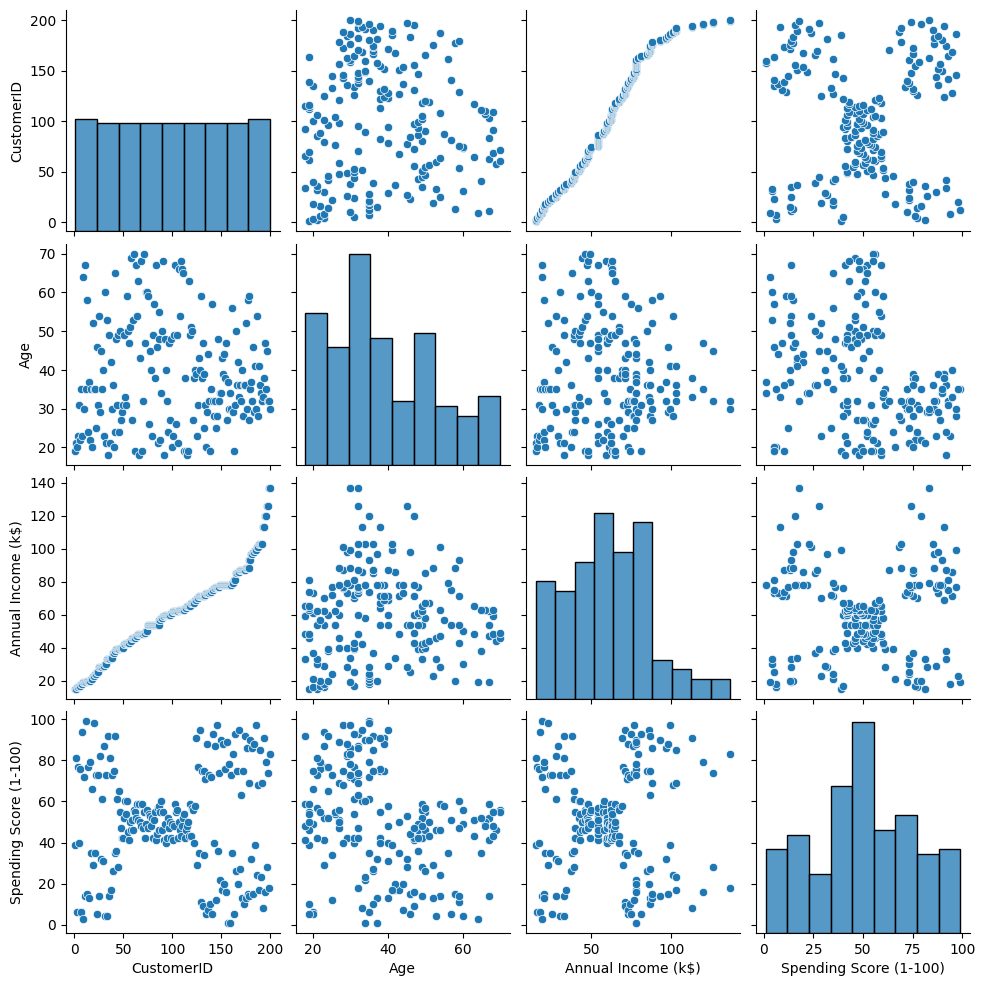

In [16]:
sns.pairplot(data)

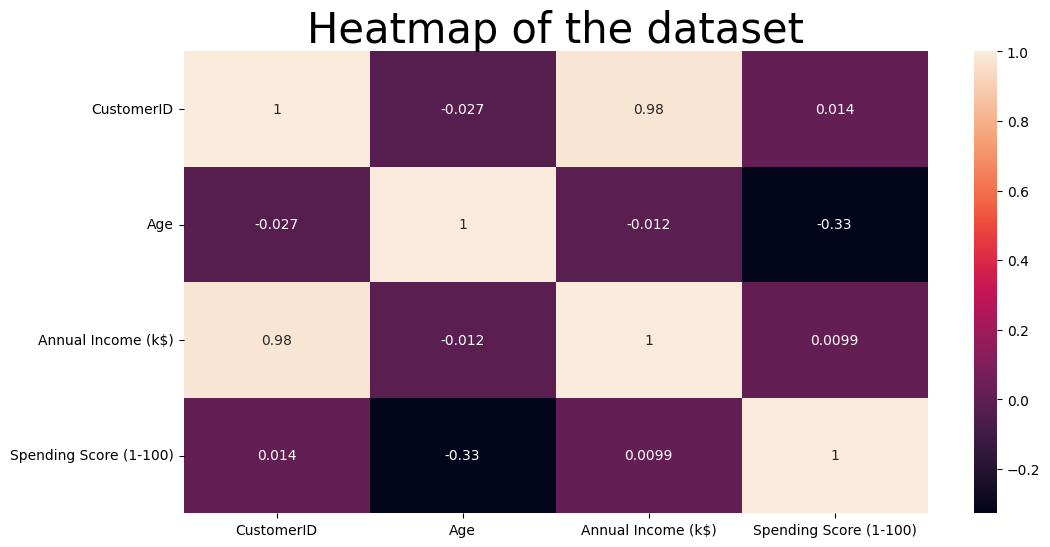

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Heatmap of the dataset', size=30)
plt.show()

In [19]:
x = data[['Age', 'Annual Income (k$)']]
y = data['Spending Score (1-100)']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [37]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [52]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='cosine')

In [57]:
y_pred = classifier.predict(x_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.025